# E7-2 Linear Regression Demo

This code demonstrates the use of linear regression methods for machine learning.

## Step 1: Problem Analysis and Framing

In [1]:
# For data manipulation
import pandas as pd

# for scientific computation
import numpy as np

# for data analysis
from sklearn import linear_model
import sklearn.metrics as sm

# for diagramming 
import matplotlib.pyplot as plt

# For serialization and deserialization of data from/to file
import pickle

## Step 2: Data Preparation

### Input Data

In [2]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('../data/student_scores.csv')

# display the first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# See the shape (number of rows) and size (number of columns)
data.shape

(25, 2)

In [4]:
# See how it looks 
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Study the Data

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Split X and y
# X, y = data["Hours"], data["Scores"]
X, y = data.iloc[0:,0:1], data.iloc[0:,1:]

### Preprocessing Data

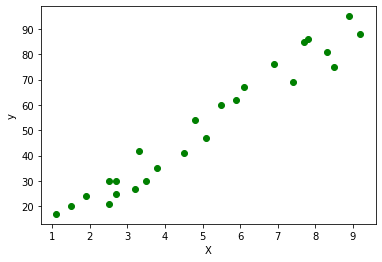

In [7]:
# Plot all
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X, y, color='green')
plt.show()

## Step 3: Train Model

### Train a Model with Polyfit

In [14]:
# The last parameter is the degree of the polynomial
# x = X.reshape(X.shape[0])
[a, b] = np.polyfit(X, y, 1)
print(a, b)

TypeError: expected 1D vector for x

In [ ]:
# plot the line
plt.scatter(X, y)
plt.plot([0, 15], [b, a*15+b])

### Train a Model with scikit-learn

In [ ]:
# Split in train and test
ntr = int(0.8 * len(X))
nts = len(X) - ntr

# Training data
X_train, y_train = X[:ntr], y[:ntr]

# Test data
X_test, y_test = X[ntr:], y[ntr:]

In [ ]:
# Plot train data
plt.scatter(X_train, y_train, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
# Plot test data - randomly selected
plt.scatter(X_test, y_test, color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
# Create linear regressor object
regressor = linear_model.LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

## Step 4: Test the Model

In [ ]:
# Predict the output
y_predicted = regressor.predict(X_test)
y_predicted

In [ ]:
# Calculate a score associated with this model
regressor.score(X_test, y_test)

In [ ]:
# Plot output
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_predicted, color='magenta', linewidth=1)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Step 5: Validate the Accuracy

In [ ]:
# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predicted), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predicted), 2))
print("R2 score =", round(sm.r2_score(y_test, y_predicted), 2))

In [ ]:
# Perform prediction on train data, reuse
y_new_prediction = regressor.predict(X_test)
y_new_prediction

In [ ]:
print("New R2 score = ", round(sm.r2_score(y_test, y_new_prediction), 2))

## Step 6: Implement the Model for Prediction of New Data

In [ ]:
my_prediction = regressor.predict([[-5.86]])
print(my_prediction)
print("Mean squared error = ", round(sm.mean_squared_error([-0.86], my_prediction), 2))
# [-0.86  1.11]

In [ ]:
my_prediction = regressor.predict([[5.42]])
print(my_prediction)
# [0.42 4.92]

## Step 7: Store the Model in a File

In [ ]:
# Store the model in a file
reg_model_file = '../deploy/regressor.pkl'

# Save now
with open(reg_model_file, 'wb') as f:
    pickle.dump(regressor, f)

In [ ]:
# To load it later for reuse
with open(reg_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

In [ ]:
# Test reading from the file
my_prediction = regressor_model.predict([[0.42]])
print(my_prediction)